In [1]:
!pip install imageio


In [2]:
import os
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import imageio
import cv2
from IPython.display import Image

In [3]:
IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 50
MAX_SEQ_LENGTH = 20
NUM_FEATURES = 2048

In [4]:
dfd_fake = r"C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences"

dfd_real = r"C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences"


In [5]:
video_paths = []
labels = []


for vid in os.listdir(dfd_real):
    video_paths.append(os.path.join(dfd_real, vid))
    labels.append('real')
    
for vid in os.listdir(dfd_fake):
    video_paths.append(os.path.join(dfd_fake, vid))
    labels.append('fake')

In [6]:
print("First 10 video paths:", video_paths[:10])
print("Last 10 video paths:", video_paths[-10:])

# Print the first 10 and last 10 elements of labels
print("First 10 labels:", labels[:10])
print("Last 10 labels:", labels[-10:])

First 10 video paths: ['C:\\Users\\Tanish Garg\\.cache\\kagglehub\\datasets\\sanikatiwarekar\\deep-fake-detection-dfd-entire-original-dataset\\DFD_original sequences\\01__exit_phone_room.mp4', 'C:\\Users\\Tanish Garg\\.cache\\kagglehub\\datasets\\sanikatiwarekar\\deep-fake-detection-dfd-entire-original-dataset\\DFD_original sequences\\01__hugging_happy.mp4', 'C:\\Users\\Tanish Garg\\.cache\\kagglehub\\datasets\\sanikatiwarekar\\deep-fake-detection-dfd-entire-original-dataset\\DFD_original sequences\\01__kitchen_pan.mp4', 'C:\\Users\\Tanish Garg\\.cache\\kagglehub\\datasets\\sanikatiwarekar\\deep-fake-detection-dfd-entire-original-dataset\\DFD_original sequences\\01__kitchen_still.mp4', 'C:\\Users\\Tanish Garg\\.cache\\kagglehub\\datasets\\sanikatiwarekar\\deep-fake-detection-dfd-entire-original-dataset\\DFD_original sequences\\01__meeting_serious.mp4', 'C:\\Users\\Tanish Garg\\.cache\\kagglehub\\datasets\\sanikatiwarekar\\deep-fake-detection-dfd-entire-original-dataset\\DFD_original se

In [7]:
df = pd.DataFrame({'video_path': video_paths, 'label': labels})

In [8]:
df.head(10)

,video_path,label
0,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,real
1,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,real
2,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,real
3,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,real
4,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,real
5,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,real
6,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,real
7,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,real
8,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,real
9,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,real


In [9]:
# shuffle the rows
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [10]:
df.head(10)

,video_path,label
0,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,fake
1,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,fake
2,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,fake
3,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,fake
4,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,fake
5,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,fake
6,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,fake
7,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,fake
8,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,real
9,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,fake


In [11]:
label_counts = df['label'].value_counts()
label_counts

label
fake    3068
real     364
Name: count, dtype: int64

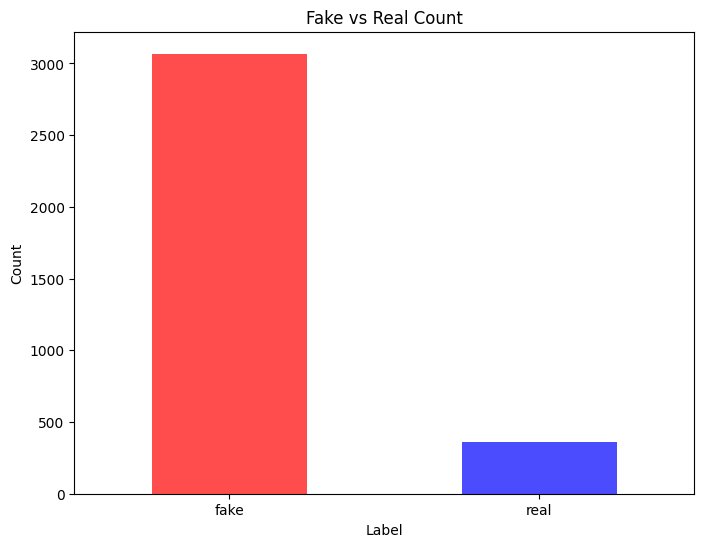

In [12]:
# Plot the counts
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['red', 'blue'], alpha=0.7)
plt.title('Fake vs Real Count')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

taking only 100 videos for testing purpose

In [13]:
# Shuffle the rows in the DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate real and fake labels
real_videos = df[df['label'] == 'real']
fake_videos = df[df['label'] == 'fake']

# Take 50 videos from each class
real_sample = real_videos.sample(n=300, random_state=42)
fake_sample = fake_videos.sample(n=300, random_state=42)

# Combine the samples
df = pd.concat([real_sample, fake_sample]).sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Number of videos in balanced_df: {len(df)}")
print(df['label'].value_counts())

Number of videos in balanced_df: 600
label
real    300
fake    300
Name: count, dtype: int64


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Stratified split to maintain class distribution
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# Save the train and test sets to CSV files
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

# Verify class distribution
print("Class distribution in Train set:")
print(train_df['label'].value_counts())

print("Class distribution in Test set:")
print(test_df['label'].value_counts())

Class distribution in Train set:
label
fake    240
real    240
Name: count, dtype: int64
Class distribution in Test set:
label
fake    60
real    60
Name: count, dtype: int64


In [15]:
train_df = pd.read_csv(r"C:\Users\Tanish Garg\OneDrive\Desktop\personal project\deep fake detection\train.csv")
test_df = pd.read_csv(r"C:\Users\Tanish Garg\OneDrive\Desktop\personal project\deep fake detection\test.csv")

print(f"Total videos for training: {len(train_df)}")
print(f"Total videos for testing: {len(test_df)}")

train_df.sample(10)

Total videos for training: 480
Total videos for testing: 120


,video_path,label
254,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,real
307,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,real
151,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,fake
351,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,real
60,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,fake
134,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,fake
248,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,fake
135,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,fake
193,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,fake
344,C:\Users\Tanish Garg\.cache\kagglehub\datasets...,real


In [16]:
def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]

def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

In [17]:
def build_feature_extractor():
    feature_extractor = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.inception_v3.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")

feature_extractor = build_feature_extractor()

In [18]:
label_processor = keras.layers.StringLookup(
    num_oov_indices=0, vocabulary=np.unique(train_df["label"])
)
print(label_processor.get_vocabulary())

['fake', 'real']


In [19]:
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import numpy as np

def process_video(video_path):
    """
    Process a single video to extract features and create masks.
    Args:
        video_path (str): Full path to the video file.
    Returns:
        tuple: Extracted frame features and frame mask.
    """
    frames = load_video(video_path)
    frames = frames[None, ...]

    temp_frame_mask = np.zeros(
        shape=(
            1,
            MAX_SEQ_LENGTH,
        ),
        dtype="bool",
    )
    temp_frame_features = np.zeros(
        shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
    )

    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            temp_frame_features[i, j, :] = feature_extractor.predict(
                batch[None, j, :], verbose=0,
            )
        temp_frame_mask[i, :length] = 1  # Set the mask for valid frames
    print(f"{video_path} completed\n")
    return temp_frame_features.squeeze(), temp_frame_mask.squeeze()

def prepare_all_videos(df):
    """
    Prepare features and masks for all videos in the DataFrame.
    Args:
        df (pd.DataFrame): DataFrame containing video paths and labels.
    Returns:
        tuple: (frame features, frame masks), labels
    """
    video_paths = df["video_path"].values.tolist()  # Use full paths directly
    labels = df["label"].values

    # Add progress bar
    with ThreadPoolExecutor(max_workers=20) as executor:  # Adjust number of workers as needed
        results = list(
            tqdm(
                executor.map(process_video, video_paths),
                total=len(video_paths),
                desc="Processing videos"
            )
        )

    frame_features, frame_masks = zip(*results)
    frame_features = np.array(frame_features)
    frame_masks = np.array(frame_masks)

    labels = labels[..., None]

    return (frame_features, frame_masks), labels

# Prepare train and test datasets
train_data, train_labels = prepare_all_videos(train_df)
test_data, test_labels = prepare_all_videos(test_df)

print(f"Frame features in train set: {train_data[0].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")

Processing videos:   0%|                                                                       | 0/480 [00:00<?, ?it/s]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\21_07__kitchen_pan__K7KXUHMU.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\27_02__podium_speech_happy__FV8M8O2C.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\27__walking_down_street_outside_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\02_13__kitchen_pan__CP5HFV3K.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\05__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-e

Processing videos:   0%|                                                           | 1/480 [01:47<14:18:19, 107.51s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\01_27__meeting_serious__ZYCZ30C0.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\04__outside_talking_still_laughing.mp4 completed



Processing videos:   0%|▎                                                            | 2/480 [02:20<8:26:51, 63.62s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\13__walking_down_indoor_hall_disgust.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_07__walking_down_indoor_hall_disgust__CDSNLDQ8.mp4 completed



Processing videos:   1%|▌                                                            | 4/480 [02:32<3:39:05, 27.62s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\15__walking_down_indoor_hall_disgust.mp4 completed



Processing videos:   4%|██▌                                                           | 20/480 [02:41<29:01,  3.79s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\14__walking_down_indoor_hall_disgust.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\08__exit_phone_room.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\26_18__walk_down_hall_angry__UMEX6HWU.mp4 completed



Processing videos:   4%|██▋                                                           | 21/480 [02:56<37:18,  4.88s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\12__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\02__walking_outside_cafe_disgusted.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\11_18__outside_talking_pan_laughing__PT4YKO2R.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\12__kitchen_pan.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\13__kitchen_still.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\D

Processing videos:   5%|██▊                                                           | 22/480 [03:24<59:14,  7.76s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\27__meeting_serious.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\15__walking_and_outside_surprised.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\14_07__outside_talking_still_laughing__P9QFO50U.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\03__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\09_02__podium_speech_happy__9TDCEK1Q.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-df

Processing videos:   5%|███                                                         | 24/480 [04:09<1:28:00, 11.58s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\26__talking_angry_couch.mp4 completed



Processing videos:   6%|███▉                                                          | 30/480 [04:10<41:32,  5.54s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_09__talking_angry_couch__RCETIXYL.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\02_15__walk_down_hall_angry__TN2CWM3K.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\21_25__outside_talking_pan_laughing__2R46UX3R.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\20_21__walk_down_hall_angry__ZCB5OMEW.mp4 completed



Processing videos:   8%|█████▏                                                        | 40/480 [04:43<31:36,  4.31s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\07__podium_speech_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\09__kitchen_pan.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\01_04__walking_down_street_outside_angry__GBC7ZGDP.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\04__kitchen_still.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\19__walk_down_hall_angry.mp4 completed



Processing videos:   9%|█████▍                                                        | 42/480 [05:10<40:42,  5.58s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\10__talking_angry_couch.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\08__outside_talking_still_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\07__outside_talking_pan_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\07__kitchen_still.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\26__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_origi

Processing videos:  10%|█████▉                                                        | 46/480 [05:21<34:23,  4.75s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\23__talking_angry_couch.mp4 completed



Processing videos:  10%|██████▏                                                       | 48/480 [05:29<33:33,  4.66s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\24__talking_angry_couch.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\28__outside_talking_still_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\16_08__hugging_happy__8Q7JCS95.mp4 completed



Processing videos:  11%|██████▌                                                       | 51/480 [05:34<27:20,  3.82s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\16__walking_outside_cafe_disgusted.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\25_12__walking_outside_cafe_disgusted__G26LG5N7.mp4 completed



Processing videos:  13%|████████                                                      | 62/480 [05:51<17:38,  2.53s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\03__outside_talking_still_laughing.mp4 completed



Processing videos:  13%|████████▏                                                     | 63/480 [05:56<18:36,  2.68s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\03__hugging_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\01__walking_outside_cafe_disgusted.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\09_26__talking_against_wall__C3K20JOL.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\17__outside_talking_still_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\07__walk_down_hall_angry.mp4 completed



Processing videos:  13%|████████▎                                                     | 64/480 [06:23<33:35,  4.84s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\26_06__podium_speech_happy__L5BVR5L9.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\18__walking_outside_cafe_disgusted.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\14_03__exit_phone_room__0O9TTCJT.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\15_20__kitchen_pan__99NHTFBM.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\15_21__hugging_happy__87WSBJP3.mp4 completed



Processing videos:  14%|████████▋                                                     | 67/480 [06:54<44:26,  6.46s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\09_21__talking_angry_couch__Z8H2TRCI.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\04__podium_speech_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\01__exit_phone_room.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_07__podium_speech_happy__6PHZRQ4H.mp4 completed



Processing videos:  14%|████████▉                                                     | 69/480 [07:09<45:30,  6.64s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\26_04__talking_against_wall__WX836VLY.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\25__outside_talking_pan_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\28__outside_talking_pan_laughing.mp4 completed



Processing videos:  15%|█████████▏                                                    | 71/480 [07:23<45:30,  6.68s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\15_02__talking_angry_couch__I8G2LWD1.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\20__walking_down_street_outside_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\18_26__walking_down_street_outside_angry__UMEX6HWU.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\12_15__secret_conversation__RK17XFJ9.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\13_02__walking_down_street_outside_angry__2YSYT2N3.mp4 completed

C:\Users\Tanish Garg\.cache\k

Processing videos:  16%|█████████▋                                                    | 75/480 [07:38<36:11,  5.36s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\03__talking_angry_couch.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\17__walking_down_street_outside_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\27__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\10__podium_speech_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\14__kitchen_still.mp4 completed



Processing videos:  16%|██████████▏                                                   | 79/480 [08:01<36:59,  5.53s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\25_11__podium_speech_happy__JX0SAMTC.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\12_13__kitchen_still__BFH4F0N8.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\01_20__walk_down_hall_angry__FW94AIMJ.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\20_26__kitchen_pan__34DJQS3E.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\01_03__podium_speech_happy__480LQD1C.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-

Processing videos:  19%|███████████▉                                                  | 92/480 [08:40<24:48,  3.84s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\26_25__talking_against_wall__PQ41U3IJ.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\06__kitchen_pan.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\14_13__outside_talking_pan_laughing__KMQ3AW6A.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\24_19__outside_talking_pan_laughing__59PN7WZ2.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\04__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-de

Processing videos:  20%|████████████▋                                                 | 98/480 [09:05<24:50,  3.90s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\22__walking_outside_cafe_disgusted.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\27__walking_and_outside_surprised.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\16__kitchen_still.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\22__outside_talking_still_laughing.mp4 completed



Processing videos:  22%|█████████████▎                                               | 105/480 [09:10<17:30,  2.80s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\12__hugging_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\02_01__exit_phone_room__YVGY8LOK.mp4 completed



Processing videos:  23%|█████████████▊                                               | 109/480 [09:20<16:45,  2.71s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\15_14__walking_and_outside_surprised__OMLZILK3.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\09_13__walk_down_hall_angry__BVZGDFD8.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\14__hugging_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\21_09__walk_down_hall_angry__WBPEX4CU.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\18_14__kitchen_still__A5A1Q467.mp4 completed



Processing videos:  23%|█████████████▉                                               | 110/480 [09:50<32:02,  5.20s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\04_11__outside_talking_still_laughing__JRQWOV1G.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\17__podium_speech_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_14__exit_phone_room__H0VQHGS3.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\01_11__hugging_happy__P06JKA75.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\09_02__walking_down_street_outside_angry__6KUOFMZW.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiw

Processing videos:  23%|██████████████                                               | 111/480 [10:08<40:48,  6.64s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\17__walking_and_outside_surprised.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\25_27__walk_down_hall_angry__GNIMW95Z.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\07__talking_against_wall.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\20_25__hugging_happy__RSCD7KXO.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\23__kitchen_pan.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-da

Processing videos:  25%|███████████████▌                                             | 122/480 [10:51<28:17,  4.74s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\22__walking_down_indoor_hall_disgust.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\01__kitchen_pan.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\14_07__walk_down_hall_angry__P9QFO50U.mp4 completed



Processing videos:  28%|█████████████████                                            | 134/480 [11:05<15:32,  2.70s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\11__secret_conversation.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_15__walking_and_outside_surprised__OY4I7ZU8.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\24__exit_phone_room.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\13_03__walking_outside_cafe_disgusted__GBYWJW06.mp4 completed



Processing videos:  28%|█████████████████▏                                           | 135/480 [11:26<22:05,  3.84s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\16_08__walking_down_indoor_hall_disgust__8Q7JCS95.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\18_20__outside_talking_pan_laughing__8BMQOD7S.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\25_21__walking_down_street_outside_angry__2R46UX3R.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\14_18__walking_and_outside_surprised__A5A1Q467.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\06_03__hugging_happy__4I8LRXWF.mp4 completed

C:\Users\Tanish

Processing videos:  29%|█████████████████▌                                           | 138/480 [11:48<26:21,  4.62s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\03__walking_down_street_outside_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\11_18__outside_talking_pan_laughing__KLKJ9FPE.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\06__walk_down_hall_angry.mp4 completed



Processing videos:  30%|██████████████████▍                                          | 145/480 [12:02<19:33,  3.50s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\22__talking_against_wall.mp4 completed



Processing videos:  30%|██████████████████▌                                          | 146/480 [12:13<22:45,  4.09s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\06__walking_and_outside_surprised.mp4 completed



Processing videos:  31%|██████████████████▋                                          | 147/480 [12:19<24:06,  4.34s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\02_18__walking_and_outside_surprised__B95S4G6F.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\14_15__outside_talking_still_laughing__4SO1CSAM.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\04_26__kitchen_pan__MS2MLJP1.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\01_20__walking_and_outside_surprised__6UBMLXK3.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\27_26__meeting_serious__IE9N0ZI9.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehu

Processing videos:  32%|███████████████████▎                                         | 152/480 [13:05<34:42,  6.35s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\26_12__talking_angry_couch__OVOQACG8.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\28__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\13_12__walking_down_indoor_hall_disgust__SIA5P4HL.mp4 completed



Processing videos:  33%|████████████████████                                         | 158/480 [13:10<21:41,  4.04s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\21__walking_and_outside_surprised.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\20_21__hugging_happy__ZCB5OMEW.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\27_01__podium_speech_happy__S2YCUY48.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\18__podium_speech_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\04_02__outside_talking_pan_laughing__8CH7R4LW.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-d

Processing videos:  34%|████████████████████▍                                        | 161/480 [13:58<36:13,  6.81s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\20__talking_angry_couch.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\05_28__exit_phone_room__U9LRLJ6N.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\08__kitchen_pan.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\07_15__walk_down_hall_angry__KM6M2TBT.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\10__walking_down_street_outside_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-origin

Processing videos:  35%|█████████████████████▍                                       | 169/480 [14:31<28:40,  5.53s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\07__talking_angry_couch.mp4 completed



Processing videos:  38%|███████████████████████▎                                     | 183/480 [14:33<13:03,  2.64s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\18__walking_down_street_outside_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\04_15__walk_down_hall_angry__7NW4Z6WZ.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\04__walking_down_street_outside_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\02_12__outside_talking_pan_laughing__9D2ZHEKW.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\01_21__walk_down_hall_angry__03X7CELV.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\s

Processing videos:  38%|███████████████████████▍                                     | 184/480 [15:22<24:52,  5.04s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\14_06__podium_speech_happy__8U9ULZDT.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\21__outside_talking_still_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\13__kitchen_pan.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\25_20__outside_talking_still_laughing__NPM0ENKD.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\04_01__kitchen_pan__GBC7ZGDP.mp4 completed



Processing videos:  39%|███████████████████████▊                                     | 187/480 [15:29<22:18,  4.57s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\12__podium_speech_happy.mp4 completed



Processing videos:  39%|███████████████████████▉                                     | 188/480 [15:35<22:39,  4.66s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\09_20__podium_speech_happy__O5X0AWR9.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\12__exit_phone_room.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\13_12__secret_conversation__DJ7MF331.mp4 completed



Processing videos:  40%|████████████████████████▎                                    | 191/480 [15:57<25:48,  5.36s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\12__walking_down_indoor_hall_disgust.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\07_03__kitchen_pan__WPT3Z2KN.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_07__outside_talking_still_laughing__W3MXGEU9.mp4 completed



Processing videos:  41%|█████████████████████████▏                                   | 198/480 [16:10<17:45,  3.78s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\03__walking_and_outside_surprised.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\26_07__outside_talking_still_laughing__FGNGC2GT.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\09__outside_talking_pan_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\14_03__walk_down_hall_angry__7JPPCV50.mp4 completed



Processing videos:  42%|█████████████████████████▉                                   | 204/480 [16:15<12:19,  2.68s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\20_01__secret_conversation__6UBMLXK3.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\15_13__exit_phone_room__X0EIIJF7.mp4 completed



Processing videos:  43%|██████████████████████████▏                                  | 206/480 [16:26<14:08,  3.10s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\05__outside_talking_still_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\13_15__kitchen_still__X0EIIJF7.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\02_25__hugging_happy__Z7FQ69VP.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\07_11__hugging_happy__R7R86Z62.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\18_11__outside_talking_pan_laughing__PT4YKO2R.mp4 completed



Processing videos:  44%|██████████████████████████▋                                  | 210/480 [16:48<16:59,  3.78s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\09_21__talking_against_wall__PF4WD2KJ.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\03__outside_talking_pan_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\28__secret_conversation.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\09_20__walk_down_hall_angry__MKEWB4SM.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\25__walking_outside_cafe_disgusted.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detectio

Processing videos:  44%|███████████████████████████                                  | 213/480 [17:17<23:11,  5.21s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\25__talking_against_wall.mp4 completed



Processing videos:  46%|███████████████████████████▉                                 | 220/480 [17:20<13:18,  3.07s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\19__kitchen_pan.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\07_26__talking_against_wall__FGNGC2GT.mp4 completed



Processing videos:  46%|████████████████████████████                                 | 221/480 [17:42<20:15,  4.69s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\08__podium_speech_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\19_23__kitchen_still__WHQ1229T.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\17__kitchen_still.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\15__talking_against_wall.mp4 completed



Processing videos:  46%|████████████████████████████▏                                | 222/480 [17:47<20:21,  4.74s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\23__podium_speech_happy.mp4 completed



Processing videos:  48%|████████████████████████████▉                                | 228/480 [17:49<10:52,  2.59s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\13__secret_conversation.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\19_23__walk_down_hall_angry__F7U8UY7V.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\19_10__walk_down_hall_angry__BVVPN5D5.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\24__outside_talking_pan_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\21__walking_down_street_outside_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detec

Processing videos:  48%|█████████████████████████████▍                               | 232/480 [18:51<27:37,  6.68s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\26_25__talking_angry_couch__GJT740J9.mp4 completed



Processing videos:  49%|█████████████████████████████▉                               | 236/480 [19:03<22:30,  5.54s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_01__talking_angry_couch__JZUXXFRB.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\12_15__kitchen_still__RK17XFJ9.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\18_26__secret_conversation__UMEX6HWU.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\10_19__outside_talking_still_laughing__O2IKR6YM.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\16__podium_speech_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\dee

Processing videos:  50%|██████████████████████████████▋                              | 241/480 [19:35<23:17,  5.85s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\03__walking_down_indoor_hall_disgust.mp4 completed



Processing videos:  52%|███████████████████████████████▌                             | 248/480 [19:36<13:07,  3.39s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\20__podium_speech_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\17__outside_talking_pan_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\03__kitchen_pan.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\16__walking_down_indoor_hall_disgust.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\10__kitchen_pan.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original seque

Processing videos:  52%|███████████████████████████████▊                             | 250/480 [20:16<24:52,  6.49s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\11__talking_angry_couch.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\14_03__exit_phone_room__7JPPCV50.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\02_06__walking_outside_cafe_disgusted__GH8TGTBS.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\02__outside_talking_pan_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\02__exit_phone_room.mp4 completed



Processing videos:  55%|█████████████████████████████████▍                           | 263/480 [20:37<12:20,  3.41s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\23__outside_talking_still_laughing.mp4 completed



Processing videos:  55%|█████████████████████████████████▌                           | 264/480 [20:51<14:49,  4.12s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\14__secret_conversation.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\07_02__walk_down_hall_angry__1JCLEEBQ.mp4 completed



Processing videos:  56%|██████████████████████████████████                           | 268/480 [20:53<11:02,  3.13s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_02__secret_conversation__QH3Y0IG0.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\21_11__walking_outside_cafe_disgusted__T7DK03O1.mp4 completed



Processing videos:  56%|██████████████████████████████████▏                          | 269/480 [21:09<14:47,  4.21s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\19__podium_speech_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\22_24__walking_down_street_outside_angry__XL557XC6.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\20__kitchen_still.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\01__talking_against_wall.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\08__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-datase

Processing videos:  57%|██████████████████████████████████▋                          | 273/480 [21:24<13:41,  3.97s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\23__walking_and_outside_surprised.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\14__walking_outside_cafe_disgusted.mp4 completed



Processing videos:  58%|███████████████████████████████████▍                         | 279/480 [21:29<07:41,  2.30s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\22__kitchen_still.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\01_11__hugging_happy__4OJNJLOO.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\07__hugging_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\11__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\21_18__outside_talking_pan_laughing__PQFTWVRQ.mp4 completed



Processing videos:  58%|███████████████████████████████████▌                         | 280/480 [21:54<18:06,  5.43s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\21_06__walking_down_indoor_hall_disgust__058I9NIZ.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\09__walking_down_street_outside_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\18__outside_talking_still_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\25_09__walking_outside_cafe_disgusted__ODAQ7BZL.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\06_02__walking_down_street_outside_angry__37DH75GQ.mp4 completed

C:\Users\Tanish Garg\.ca

Processing videos:  59%|████████████████████████████████████▏                        | 285/480 [22:36<22:32,  6.93s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\15__podium_speech_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\15_13__walking_down_street_outside_angry__X0EIIJF7.mp4 completed



Processing videos:  60%|████████████████████████████████████▊                        | 290/480 [22:42<14:23,  4.54s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\20__walking_and_outside_surprised.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\27_25__walk_down_hall_angry__GNIMW95Z.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\28_05__exit_phone_room__U9LRLJ6N.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\15__walking_down_street_outside_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\11__walking_outside_cafe_disgusted.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fak

Processing videos:  61%|█████████████████████████████████████▍                       | 295/480 [23:22<18:05,  5.87s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\27__walking_down_indoor_hall_disgust.mp4 completed



Processing videos:  64%|███████████████████████████████████████▏                     | 308/480 [23:23<07:11,  2.51s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\26__kitchen_pan.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\08__walking_outside_cafe_disgusted.mp4 completed



Processing videos:  65%|███████████████████████████████████████▋                     | 312/480 [23:40<08:00,  2.86s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\27_07__kitchen_pan__B5S6XY2L.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\21_11__kitchen_still__T7DK03O1.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_14__exit_phone_room__0O9TTCJT.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\19__walking_outside_cafe_disgusted.mp4 completed



Processing videos:  65%|███████████████████████████████████████▉                     | 314/480 [24:00<10:03,  3.63s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\23__kitchen_still.mp4 completed



Processing videos:  66%|████████████████████████████████████████                     | 315/480 [24:00<08:54,  3.24s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\20_25__exit_phone_room__MUS0X71T.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\06_18__outside_talking_still_laughing__M36D0OJT.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\13_02__secret_conversation__PLNVLO74.mp4 completed



Processing videos:  66%|████████████████████████████████████████▎                    | 317/480 [24:17<12:15,  4.51s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\22__podium_speech_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\23__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\11__talking_against_wall.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_26__walk_down_hall_angry__WBSXBL82.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\12_04__kitchen_pan__B6YJ9IW1.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-datas

Processing videos:  67%|████████████████████████████████████████▋                    | 320/480 [24:52<17:34,  6.59s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\21__talking_angry_couch.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\26_12__kitchen_pan__BFBNM8FR.mp4 completed



Processing videos:  68%|█████████████████████████████████████████▋                   | 328/480 [24:56<07:04,  2.79s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\23_22__outside_talking_still_laughing__W9MT3Q5K.mp4 completed



Processing videos:  69%|█████████████████████████████████████████▊                   | 329/480 [25:01<07:31,  2.99s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\13__walking_and_outside_surprised.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\21_07__exit_phone_room__K7KXUHMU.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\18_04__walking_outside_cafe_disgusted__6J3ZFEJQ.mp4 completed



Processing videos:  69%|██████████████████████████████████████████                   | 331/480 [25:09<07:29,  3.02s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\05__podium_speech_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\11_13__talking_against_wall__61T622EK.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\26_03__walking_outside_cafe_disgusted__WBSXBL82.mp4 completed



Processing videos:  70%|██████████████████████████████████████████▍                  | 334/480 [25:30<11:20,  4.66s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\25__secret_conversation.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\06_03__kitchen_pan__2XWC5JED.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\25_20__walking_outside_cafe_disgusted__RSCD7KXO.mp4 completed



Processing videos:  70%|██████████████████████████████████████████▌                  | 335/480 [25:42<14:07,  5.85s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\20_12__talking_against_wall__GHPWDH3C.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\22_24__walking_and_outside_surprised__7E3GY85F.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\19_24__walking_down_street_outside_angry__59PN7WZ2.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\18_25__outside_talking_pan_laughing__41UL3HO6.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\22__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehu

Processing videos:  70%|██████████████████████████████████████████▊                  | 337/480 [26:26<25:51, 10.85s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\14__talking_angry_couch.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\27_02__kitchen_pan__78M8S6M6.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\12__outside_talking_still_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\14_15__hugging_happy__OMLZILK3.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\27__exit_phone_room.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset

Processing videos:  72%|███████████████████████████████████████████▉                 | 346/480 [26:37<09:33,  4.28s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\21__walking_down_indoor_hall_disgust.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\05__kitchen_pan.mp4 completed



Processing videos:  73%|████████████████████████████████████████████▋                | 352/480 [26:45<06:10,  2.90s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\10__walking_outside_cafe_disgusted.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\13_15__kitchen_pan__X0EIIJF7.mp4 completed



Processing videos:  75%|█████████████████████████████████████████████▍               | 358/480 [27:06<06:26,  3.17s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\27__kitchen_still.mp4 completed



Processing videos:  75%|█████████████████████████████████████████████▊               | 360/480 [27:18<07:14,  3.62s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\06_14__walking_and_outside_surprised__8U9ULZDT.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\14_07__exit_phone_room__P9QFO50U.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\15_02__talking_against_wall__TSRK8QS4.mp4 completed



Processing videos:  76%|██████████████████████████████████████████████▏              | 363/480 [27:22<05:43,  2.93s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\02__talking_against_wall.mp4 completed



Processing videos:  76%|██████████████████████████████████████████████▎              | 364/480 [27:22<04:53,  2.53s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\04__exit_phone_room.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\01__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\07__exit_phone_room.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\13_12__walk_down_hall_angry__Q442U52P.mp4 completed



Processing videos:  76%|██████████████████████████████████████████████▍              | 365/480 [27:44<11:11,  5.84s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\16__talking_against_wall.mp4 completed



Processing videos:  77%|██████████████████████████████████████████████▊              | 368/480 [27:46<06:16,  3.36s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\05_28__hugging_happy__VR9127O1.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\06_03__kitchen_pan__KIWCEATU.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\11__kitchen_still.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\28__kitchen_still.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\20_25__hugging_happy__M86GQTHK.mp4 completed



Processing videos:  77%|███████████████████████████████████████████████              | 370/480 [27:57<07:11,  3.92s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\17__talking_against_wall.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\02_04__walk_down_hall_angry__SUIZOXAJ.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\02_07__walk_down_hall_angry__U7DEOZNV.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\21_20__kitchen_still__ZCB5OMEW.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\25_09__outside_talking_still_laughing__ODAQ7BZL.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\

Processing videos:  78%|███████████████████████████████████████████████▎             | 372/480 [28:46<21:39, 12.04s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\01__talking_angry_couch.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_15__outside_talking_pan_laughing__AIOM1U5V.mp4 completed



Processing videos:  80%|████████████████████████████████████████████████▌            | 382/480 [28:53<06:02,  3.70s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\20_14__podium_speech_happy__R7SPX6OK.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\09_26__walk_down_hall_angry__XXGYLT82.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\04__kitchen_pan.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\07_03__walking_outside_cafe_disgusted__IFSURI9X.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\21__outside_talking_pan_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-d

Processing videos:  81%|█████████████████████████████████████████████████▍           | 389/480 [29:17<05:14,  3.45s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_09__outside_talking_still_laughing__8DTEGQ54.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\16__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\15__exit_phone_room.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\14__walking_and_outside_surprised.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\10_19__walking_outside_cafe_disgusted__BVVPN5D5.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-d

Processing videos:  82%|█████████████████████████████████████████████████▉           | 393/480 [29:43<06:27,  4.45s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\13_03__talking_angry_couch__GBYWJW06.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\25_07__walking_down_street_outside_angry__IKMKYKPG.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\07__walking_down_street_outside_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\18__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\07_06__outside_talking_pan_laughing__NMGYPBXE.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sa

Processing videos:  83%|██████████████████████████████████████████████████▋          | 399/480 [30:27<07:36,  5.63s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\21__podium_speech_happy.mp4 completed



Processing videos:  84%|███████████████████████████████████████████████████▏         | 403/480 [30:29<05:25,  4.23s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\14_26__podium_speech_happy__ILLP29ZH.mp4 completed
C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\25_18__walking_outside_cafe_disgusted__SEGFKFJG.mp4 completed


C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\04_01__walk_down_hall_angry__GBC7ZGDP.mp4 completed



Processing videos:  86%|████████████████████████████████████████████████████▏        | 411/480 [30:45<03:43,  3.24s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\22__secret_conversation.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\15__kitchen_pan.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\14_06__outside_talking_still_laughing__8U9ULZDT.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_21__kitchen_still__YCSEBZO4.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\10__talking_against_wall.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-da

Processing videos:  86%|████████████████████████████████████████████████████▎        | 412/480 [31:24<06:39,  5.88s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\11_13__talking_angry_couch__61T622EK.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\26_25__podium_speech_happy__0UFFR3U1.mp4 completed



Processing videos:  89%|██████████████████████████████████████████████████████       | 425/480 [31:27<02:19,  2.53s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\15_02__talking_against_wall__P2FAY3DR.mp4 completed



Processing videos:  89%|██████████████████████████████████████████████████████▏      | 426/480 [31:32<02:30,  2.78s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\10__outside_talking_still_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\02_07__walk_down_hall_angry__1JCLEEBQ.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\15__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\11_21__secret_conversation__T7DK03O1.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\06_11__talking_against_wall__C8C4FW99.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-

Processing videos:  89%|██████████████████████████████████████████████████████▎      | 427/480 [32:00<04:44,  5.37s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_07__walking_and_outside_surprised__IFSURI9X.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\14_27__outside_talking_pan_laughing__0KSONKQ2.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\20__kitchen_pan.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\18__secret_conversation.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\11_03__outside_talking_pan_laughing__P08VGHTA.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep

Processing videos:  90%|██████████████████████████████████████████████████████▋      | 430/480 [32:27<05:11,  6.23s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\26__talking_against_wall.mp4 completed



Processing videos:  90%|██████████████████████████████████████████████████████▊      | 431/480 [32:27<04:15,  5.21s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\27_25__hugging_happy__1KU29EUL.mp4 completed



Processing videos:  90%|███████████████████████████████████████████████████████▏     | 434/480 [32:36<03:17,  4.30s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\26__podium_speech_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\16__hugging_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\18_03__kitchen_pan__22UBC0BS.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\21_01__outside_talking_pan_laughing__03X7CELV.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\25_12__walking_down_street_outside_angry__MA71PDNV.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detec

Processing videos:  92%|████████████████████████████████████████████████████████▏    | 442/480 [33:16<02:59,  4.72s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\20__talking_against_wall.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\11__exit_phone_room.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\18_03__walk_down_hall_angry__22UBC0BS.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\13__walking_down_street_outside_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\24__outside_talking_still_laughing.mp4 completed



Processing videos:  92%|████████████████████████████████████████████████████████▍    | 444/480 [33:34<03:17,  5.48s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\09__talking_angry_couch.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\20_15__kitchen_pan__99NHTFBM.mp4 completed



Processing videos:  94%|█████████████████████████████████████████████████████████▌   | 453/480 [33:44<01:24,  3.13s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\02__hugging_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\06_15__exit_phone_room__QRCD27P8.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\27_01__outside_talking_still_laughing__ZYCZ30C0.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\21__kitchen_still.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\09__talking_against_wall.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-data

Processing videos:  95%|█████████████████████████████████████████████████████████▋   | 454/480 [34:14<02:17,  5.27s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\11__podium_speech_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\12__walking_and_outside_surprised.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\20_13__hugging_happy__EV1V4ZQV.mp4 completed



Processing videos:  96%|██████████████████████████████████████████████████████████▌  | 461/480 [34:34<01:19,  4.18s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\20_09__walking_down_indoor_hall_disgust__9OJQX9KV.mp4 completed



Processing videos:  96%|██████████████████████████████████████████████████████████▊  | 463/480 [34:34<01:01,  3.59s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\20_03__talking_against_wall__9NFWR304.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\01_26__exit_phone_room__BTVMWLG6.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\20_14__walking_down_street_outside_angry__3HWOJRAM.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\01_15__kitchen_pan__02HILKYO.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\23_22__secret_conversation__AKZRL2QD.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanik

Processing videos:  97%|███████████████████████████████████████████████████████████▏ | 466/480 [34:44<00:49,  3.53s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\13__talking_angry_couch.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\18_11__talking_against_wall__R1NMCHKG.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\18__outside_talking_pan_laughing.mp4 completed



Processing videos:  98%|███████████████████████████████████████████████████████████▊ | 471/480 [34:45<00:20,  2.29s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\14__podium_speech_happy.mp4 completed



Processing videos: 100%|█████████████████████████████████████████████████████████████| 480/480 [34:46<00:00,  4.35s/it]


C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\03__meeting_serious.mp4 completed



Processing videos:   0%|                                                                       | 0/120 [00:00<?, ?it/s]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\18_06__secret_conversation__DEA1TCLN.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\21_04__outside_talking_pan_laughing__HY1VWEJK.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\02_13__walking_outside_cafe_disgusted__CP5HFV3K.mp4 completed



Processing videos:   1%|▌                                                            | 1/120 [01:11<2:22:09, 71.68s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\26_20__walking_outside_cafe_disgusted__C8GN41DU.mp4 completed



Processing videos:   2%|█                                                            | 2/120 [01:14<1:00:51, 30.95s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\22_10__outside_talking_still_laughing__J2HR5HKH.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\01_27__hugging_happy__ZYCZ30C0.mp4 completed



Processing videos:   2%|█▌                                                             | 3/120 [01:17<35:34, 18.24s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\13__exit_phone_room.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\08__walking_down_street_outside_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\14_20__walking_outside_cafe_disgusted__3HWOJRAM.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\15__outside_talking_pan_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\11_03__exit_phone_room__P08VGHTA.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-dete

Processing videos:   3%|██                                                             | 4/120 [01:32<32:44, 16.93s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\02__kitchen_still.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\18__kitchen_pan.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\26_20__kitchen_still__34DJQS3E.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\15__kitchen_still.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\13__outside_talking_still_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequenc

Processing videos:   5%|███▏                                                           | 6/120 [01:51<25:01, 13.17s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\02__podium_speech_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_01__kitchen_pan__JZUXXFRB.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\28__walking_outside_cafe_disgusted.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\19_24__secret_conversation__DL7X7M6I.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\15_02__exit_phone_room__MZWH8ATN.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-e

Processing videos:  18%|██████████▊                                                   | 21/120 [02:44<08:10,  4.96s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_01__walking_and_outside_surprised__JZUXXFRB.mp4 completed



Processing videos:  18%|███████████▎                                                  | 22/120 [02:44<07:31,  4.60s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\14__kitchen_pan.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\04_12__walking_down_street_outside_angry__B6YJ9IW1.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\14__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\03__talking_against_wall.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\27__podium_speech_happy.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\

Processing videos:  21%|████████████▉                                                 | 25/120 [03:37<12:17,  7.76s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\14__walking_down_street_outside_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\22_10__walking_down_indoor_hall_disgust__8YQ2EUQP.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\12_13__walking_and_outside_surprised__SIA5P4HL.mp4 completed



Processing videos:  34%|█████████████████████▏                                        | 41/120 [04:04<05:00,  3.80s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\26_04__secret_conversation__WX836VLY.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\02__kitchen_pan.mp4 completed



Processing videos:  38%|███████████████████████▎                                      | 45/120 [04:08<04:05,  3.28s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\24__walking_down_street_outside_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\19_24__exit_phone_room__59PN7WZ2.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\12_18__walking_outside_cafe_disgusted__IKH1LBBY.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\22_23__walking_and_outside_surprised__TU7RHG0S.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\24_19__walking_down_street_outside_angry__59PN7WZ2.mp4 completed



Processing videos:  39%|████████████████████████▎                                     | 47/120 [04:31<05:10,  4.25s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\07_14__podium_speech_happy__VOX29AK0.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\19__walking_down_street_outside_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\01_20__outside_talking_pan_laughing__6UBMLXK3.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\25_12__walk_down_hall_angry__I2X1XTCC.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\11_20__secret_conversation__B2H95QXV.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\

Processing videos:  42%|█████████████████████████▊                                    | 50/120 [05:04<06:33,  5.62s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\28__talking_angry_couch.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\24__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\04__talking_against_wall.mp4 completed



Processing videos:  46%|████████████████████████████▍                                 | 55/120 [05:24<05:33,  5.13s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\20__walking_down_indoor_hall_disgust.mp4 completed



Processing videos:  52%|████████████████████████████████▌                             | 63/120 [05:27<02:56,  3.10s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\22__exit_phone_room.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\18_14__exit_phone_room__6SB2BR0A.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\21_07__kitchen_still__MKU99DVX.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_07__outside_talking_pan_laughing__IFSURI9X.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\23__walking_outside_cafe_disgusted.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detectio

Processing videos:  53%|█████████████████████████████████                             | 64/120 [06:09<05:25,  5.82s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\01__secret_conversation.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\04__secret_conversation.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\06_02__talking_against_wall__GH8TGTBS.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\27__outside_talking_pan_laughing.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\06_18__kitchen_pan__XJ76YU5A.mp4 completed



Processing videos:  59%|████████████████████████████████████▋                         | 71/120 [06:38<04:07,  5.04s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\04__talking_angry_couch.mp4 completed



Processing videos:  65%|████████████████████████████████████████▎                     | 78/120 [06:49<02:13,  3.18s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\22__walking_down_street_outside_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\09_01__outside_talking_still_laughing__SJZRV69J.mp4 completed



Processing videos:  68%|█████████████████████████████████████████▊                    | 81/120 [06:59<02:01,  3.12s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\06_18__talking_angry_couch__DEA1TCLN.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\06_27__talking_against_wall__S3T7SK9O.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\13_14__walking_outside_cafe_disgusted__KMQ3AW6A.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\12_07__outside_talking_still_laughing__0VN0A2T3.mp4 completed



Processing videos:  68%|██████████████████████████████████████████▎                   | 82/120 [07:03<02:05,  3.29s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\26__secret_conversation.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\09__exit_phone_room.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\06__exit_phone_room.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\11_20__kitchen_still__GNK9UR8K.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\14__talking_against_wall.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_seque

Processing videos:  70%|███████████████████████████████████████████▍                  | 84/120 [07:31<03:50,  6.41s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\14_02__podium_speech_happy__3IUBEKCT.mp4 completed



Processing videos:  75%|██████████████████████████████████████████████▌               | 90/120 [07:34<01:31,  3.07s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\08__kitchen_still.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\13_03__exit_phone_room__GBYWJW06.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\01__podium_speech_happy.mp4 completed



Processing videos:  76%|███████████████████████████████████████████████               | 91/120 [07:53<02:24,  4.97s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\01__walking_and_outside_surprised.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\04_01__exit_phone_room__0XUW13RW.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\22_23__outside_talking_pan_laughing__TU7RHG0S.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\21_14__walking_down_street_outside_angry__N0WM4GSV.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\09__walk_down_hall_angry.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwa

Processing videos:  77%|███████████████████████████████████████████████▌              | 92/120 [08:31<04:31,  9.69s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\25__podium_speech_happy.mp4 completed



Processing videos:  91%|███████████████████████████████████████████████████████▍     | 109/120 [08:32<00:24,  2.22s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\15_02__talking_against_wall__TN2CWM3K.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\18_06__walking_down_street_outside_angry__MVXBDKGB.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\28__exit_phone_room.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\12_07__talking_against_wall__0VN0A2T3.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\02_07__walking_and_outside_surprised__1VMZUH1W.mp4 completed



Processing videos:  92%|████████████████████████████████████████████████████████▍    | 111/120 [08:43<00:23,  2.57s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\08__talking_against_wall.mp4 completed



Processing videos:  96%|██████████████████████████████████████████████████████████▍  | 115/120 [08:43<00:09,  1.97s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\12__talking_against_wall.mp4 completed



Processing videos:  98%|███████████████████████████████████████████████████████████▍ | 117/120 [08:46<00:05,  1.85s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\03__kitchen_still.mp4 completed

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\03_06__meeting_serious__1IXGY2FK.mp4 completed



Processing videos: 100%|█████████████████████████████████████████████████████████████| 120/120 [08:48<00:00,  4.41s/it]

C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_original sequences\12__talking_angry_couch.mp4 completed

Frame features in train set: (480, 20, 2048)
Frame masks in train set: (480, 20)


For multiclass classification

In [20]:
def get_sequence_model():
    class_vocab = label_processor.get_vocabulary()

    frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
    mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")
    
    # Add more TimeDistributed layers with larger units
    x = keras.layers.TimeDistributed(keras.layers.Dense(512, activation='relu'))(frame_features_input)
    x = keras.layers.TimeDistributed(keras.layers.Dense(256, activation='relu'))(x)
    
    # Add more LSTM layers with larger units
    x = keras.layers.LSTM(512, return_sequences=True)(x)
    x = keras.layers.LSTM(256, return_sequences=True)(x)
    x = keras.layers.LSTM(128)(x)

    # Add additional Dense layers with dropout
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(128, activation="relu")(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(64, activation="relu")(x)

    output = keras.layers.Dense(len(class_vocab), activation="softmax")(x)

    rnn_model = keras.Model([frame_features_input, mask_input], output)

    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    rnn_model.compile(
        loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
    )
    return rnn_model


In [21]:
from sklearn.metrics import classification_report
def run_experiment(train_data, train_labels, test_data, test_labels):
    filepath = "/tmp/video_classifier/ckpt.weights.h5"
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only=True, verbose=1
    )

    seq_model = get_sequence_model()
    history = seq_model.fit(
        [train_data[0], train_data[1]],
        train_labels,
        validation_split=0.3,
        epochs=EPOCHS,
        callbacks=[checkpoint]
    )

    _, accuracy = seq_model.evaluate([test_data[0], test_data[1]], test_labels)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    
    predictions = seq_model.predict([test_data[0], test_data[1]])
    # Convert predictions to labels
    predicted_labels = np.argmax(predictions, axis=1)
    # Generate classification report
    report = classification_report(test_labels, predicted_labels)
    print("Classification Report:\n", report)

    return history, seq_model


In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)


label_encoder = LabelEncoder()
test_labels_encoded = label_encoder.fit_transform(test_labels)

C:\Users\Tanish Garg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tanish Garg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
 _, sequence_model = run_experiment(train_data, train_labels_encoded, test_data, test_labels_encoded )

Epoch 1/50


C:\Users\Tanish Garg\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_316', 'keras_tensor_317']. Received: the structure of inputs=('*', '*')
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.5122 - loss: 0.6994
Epoch 1: val_loss improved from inf to 0.69297, saving model to /tmp/video_classifier/ckpt.weights.h5
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 298ms/step - accuracy: 0.5102 - loss: 0.6998 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.5677 - loss: 0.6927
Epoch 2: val_loss improved from 0.69297 to 0.69079, saving model to /tmp/video_classifier/ckpt.weights.h5
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.5678 - loss: 0.6927 - val_accuracy: 0.5556 - val_loss: 0.6908
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.5675 - loss: 0.6813
Epoch 3: val_loss did not improve from 0.69079
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - accuracy: 0.5666 - loss: 0.6813 - val_accuracy: 0.5625 - val_loss: 0.6913
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.5282 - loss: 0.6885
Epoch 4: val_loss improved from 0.69079 to 0.68635, saving mo

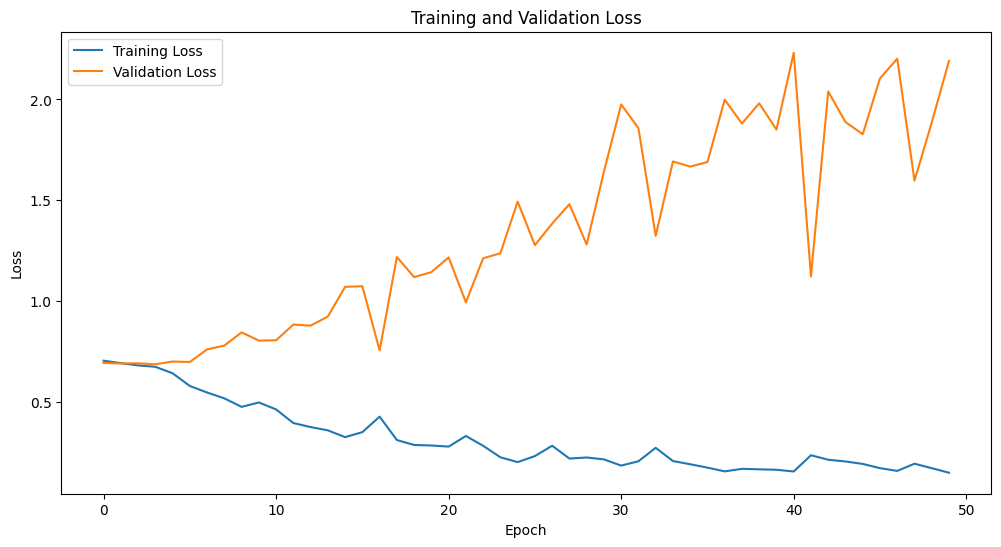

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.plot(_.history['loss'], label='Training Loss')
plt.plot(_.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

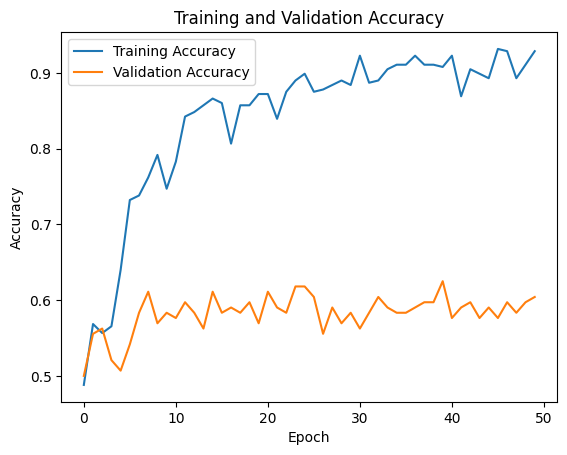

In [25]:
plt.subplot(1,1, 1)
plt.plot(_.history['accuracy'], label='Training Accuracy')
plt.plot(_.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


<Figure size 2500x2500 with 0 Axes>

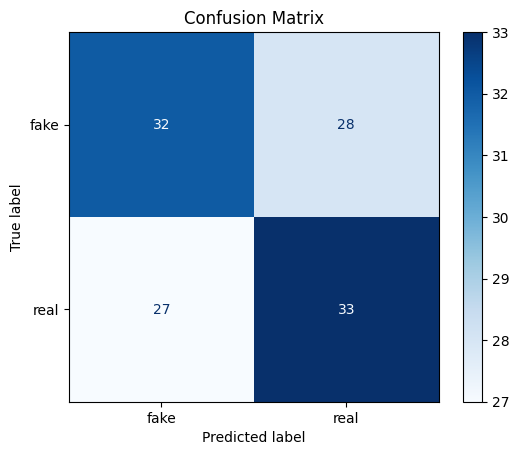

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = np.argmax(sequence_model.predict([test_data[0], test_data[1]]), axis=-1)
cm = confusion_matrix(test_labels_encoded , predictions)
display_labels = label_processor.get_vocabulary()  # Get class labels

plt.figure(figsize=(25, 25))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Test video path: C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\22_10__walking_down_indoor_hall_disgust__8YQ2EUQP.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms

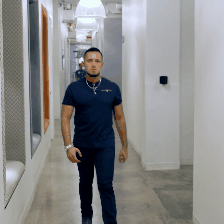

In [28]:
import os
import numpy as np
import imageio
from PIL import Image

# Function to prepare a single video for feature extraction
def prepare_single_video(frames):
    frames = frames[None, ...]  # Add a batch dimension
    frame_mask = np.zeros(
        shape=(1, MAX_SEQ_LENGTH), dtype="bool"
    )
    frame_features = np.zeros(
        shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
    )

    # Process each frame up to MAX_SEQ_LENGTH
    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
        frame_mask[i, :length] = 1  # Mark valid frames

    return frame_features, frame_mask

# Function to predict the sequence from a video
def sequence_prediction(video_path):
    class_vocab = label_processor.get_vocabulary()

    # Load the video from the given path
    frames = load_video(r"C:\Users\Tanish Garg\.cache\kagglehub\datasets\sanikatiwarekar\deep-fake-detection-dfd-entire-original-dataset\DFD_manipulated_sequences\11_18__walk_down_hall_angry__KLKJ9FPE.mp4")
    frame_features, frame_mask = prepare_single_video(frames)
    
    # Predict class probabilities
    probabilities = sequence_model.predict([frame_features, frame_mask])[0]

    # Print the probabilities for each class in descending order
    for i in np.argsort(probabilities)[::-1]:
        print(f"{class_vocab[i]}: {probabilities[i] * 100:5.2f}%")
    
    return frames

# Convert a set of frames to a GIF for visualization
def to_gif(images, output_filename="animation.gif"):
    converted_images = images.astype(np.uint8)
    imageio.mimsave(output_filename, converted_images, duration=100)
    return Image.open(output_filename)

# Select a random test video from the DataFrame and display results
test_video_path = np.random.choice(test_df["video_path"].values.tolist())  # Get the full path directly
print(f"Test video path: {test_video_path}")

# Perform sequence prediction and generate GIF
test_frames = sequence_prediction(test_video_path)
to_gif(test_frames[:MAX_SEQ_LENGTH])